# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from functools import reduce
import requests
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from scipy import stats
import warnings
import matplotlib.ticker as ticker
warnings.simplefilter('ignore')

# Functions

In [2]:
def unique(list1):
    x = np.array(list1)
    x = np.unique(x)
    return x


def isNan(string):
    return string != string


def Replace_NAN_With_Group_Mean(df, column_names, groupby_name):
    for column_name in column_names:
        df[column_name] = df.groupby(groupby_name)[column_name].transform(
            lambda x: x.fillna(x.mean()))


def Replace_NAN_With_Mean(df, column_name):
    df[column_name].fillna(df[column_name].mean(), inplace=True)


def Remove_Percentage_Year(df):
    extract_string_before_percentage = re.compile("(.*?)\s*\%")
    for x in df.index:
        growth = df["Real_Growth_Rating_Percentage"][x]
        litercy = df["Literacy_Rate_Percentage"][x]
        infiliation = df["Inflation_Percentage"][x]
        unemployment = df["Unemployment_Percentage"][x]
        if((not isNan(growth))):
            growth = re.findall('\d*\.\d+|\d+', growth)
            if growth:
                df["Real_Growth_Rating_Percentage"][x] = growth[0]
            else:
                df["Real_Growth_Rating_Percentage"][x] = np.nan

        if((not isNan(litercy))):
            litercy = re.findall('\d*\.\d+|\d+', litercy)
            if litercy:
                df["Literacy_Rate_Percentage"][x] = litercy[0]
            else:
                df["Literacy_Rate_Percentage"][x] = np.nan

        if((not isNan(infiliation))):
            infiliation = re.findall('\d*\.\d+|\d+', infiliation)
            if infiliation:
                df["Inflation_Percentage"][x] = infiliation[0]
            else:
                df["Inflation_Percentage"][x] = np.nan
        if((not isNan(unemployment))):
            unemployment = re.findall('\d*\.\d+|\d+', unemployment)
            if unemployment:
                df["Unemployment_Percentage"][x] = unemployment[0]
            else:
                df["Unemployment_Percentage"][x] = np.nan
    df["Real_Growth_Rating_Percentage"] = df.Real_Growth_Rating_Percentage.astype(
        float)
    df["Literacy_Rate_Percentage"] = df.Literacy_Rate_Percentage.astype(float)
    df["Inflation_Percentage"] = df.Inflation_Percentage.astype(float)
    df["Unemployment_Percentage"] = df.Unemployment_Percentage.astype(float)


def load_data(path):
    return pd.read_csv(path, index_col=0)


def Clean_Country_Names(df):
    extract_string_before_brackets = re.compile("(.*?)\s*\((.*?)\)")
    extract_string_before_comma = re.compile("(.*?)\s*\,")
    for x in df.index:
        country = df['Country/Region'][x]
        if '&' in country:
            df['Country/Region'][x] = country.replace('&', 'and')
        if(country == "Viet Nam"):
            country = "Vietnam"
            df['Country/Region'][x] = country
            continue
        if(country == "Hong Kong S.A.R., China"):
            country = "Hong Kong"
            df['Country/Region'][x] = country
            continue
        if(country == "United States of America" or country == "America" or country == "United-states"):
            country = "United States"
            df['Country/Region'][x] = country
            continue
        if(country == "The former Yugoslav republic of Macedonia" or country == "North Macedonia"):
            country = "Macedonia"
            df['Country/Region'][x] = country
            continue
        if(country == "Taiwan Province of China"):
            country = "Taiwan"
            df['Country/Region'][x] = country
            continue
        if(country == "Syrian Arab Republic"):
            country = "Syria"
            df['Country/Region'][x] = country
            continue

        if(country == "Democratic People's Republic of Korea" or country == "North-korea"):
            country = "North Korea"
            df['Country/Region'][x] = country
            continue

        if(country == "San-marino"):
            country = "San Marino"
            df['Country/Region'][x] = country
            continue

        if(country == "Congo" or country == "Congo-rep"):
            country = 'Rep. Congo'
            df['Country/Region'][x] = country

        if(country == "Republic of Korea" or country == "Korea" or country == "Republic of Korea " or country == "South-korea"):
            country = "South Korea"
            df['Country/Region'][x] = country
            continue
        if(country == "Democratic Republic of the Congo" or country == "Congo-dem-rep"):
            country = "Dem. Congo"
            df['Country/Region'][x] = country
            continue
        if(country == "Russian Federation"):
            country = "Russia"
            df['Country/Region'][x] = country
            continue
        if(country == "North-macedonia"):
            country = 'Macedonia'
            df['Country/Region'][x] = country
            continue
        if(country == "South-sudan"):
            country = "South Sudan"
            df['Country/Region'][x] = country
            continue
        if(country == "Somaliland region"):
            country = "Somaliland Region"
            df['Country/Region'][x] = country
            continue
        if(country == "United Kingdom of Great Britain and Northern Ireland" or country == "United-kingdom"):
            country = "United Kingdom"
            df['Country/Region'][x] = country
            continue
        if(country == "United Republic of Tanzania"):
            country = "Tanzania"
            df['Country/Region'][x] = country
            continue
        if(country == "Czech Republic" or country == "Czech-republic"):
            country = "Czechia"
            df['Country/Region'][x] = country
            continue
        if(country == "Palestinian Territories"):
            country = "Palestine"
            df['Country/Region'][x] = country
            continue
        if(country == "Northern Cyprus"):
            df['Country/Region'][x] = "North Cyprus"
            continue
        if(country == "Syrian-arab-republic"):
            country = "Syria"
            df['Country/Region'][x] = country
            continue

        if(country == "lao people's democratic republic" or
           country == "Lao People's Democratic Republic" or
           country == "Lao-pdr"):
            df['Country/Region'][x] = "Laos"
            continue
        if(country == "Kyrgyz-republic"):
            country = "Kyrgyzstan"
            df['Country/Region'][x] = country
            continue
        if(country == "Slovak-republic"):
            country = "Slovakia"
            df['Country/Region'][x] = country
            continue
        if(country == "St-vincent-and-the-grenadines"):
            country = "Saint Vincent and the Grenadines"
            df['Country/Region'][x] = country
            continue
        if(country == "St-lucia"):
            country = "Saint Lucia"
            df['Country/Region'][x] = country
            continue
        if(country == "St-kitts-and-nevis"):
            country = "Saint Kitts and Nevis"
            df['Country/Region'][x] = country
            continue
        if(country == "Sao-tome-and-principe"):
            country = "Sao Tome and Principe"
            df['Country/Region'][x] = country
            continue
        if(country == "Papua-new-guinea"):
            country = "Papua New Guinea"
            df['Country/Region'][x] = country
            continue

        if '(' in country:
            extract = extract_string_before_brackets.match(country)
            if extract.group(2) == "U.S.":
                df['Country/Region'][x] = "United States"
            elif extract.group(2) == "British":
                df['Country/Region'][x] = "United Kingdom"
            else:
                df['Country/Region'][x] = extract.group(1)
            continue
        if ',' in country:
            df['Country/Region'][x] = extract_string_before_comma.match(
                country).group(1)
            continue
        if 'Republic of 'in country:
            df['Country/Region'][x] = country.replace('Republic of ', '')


def normalise_and_scale(df, columns):
    df_def = df.copy()
    for i in columns:
        if(df_def[i].min() < 1):
            df_def[i] = df_def[i]+0.1
        df_def[i] = stats.boxcox(df_def[i])[0]
    mms = MinMaxScaler(feature_range=(0, 1))
    df_def[columns] = mms.fit_transform(df_def[columns])
    return df_def


def normalise(df, columns):
    df_def = df.copy()
    mms = MinMaxScaler(feature_range=(0, 1))
    df_def[columns] = mms.fit_transform(df_def[columns])
    return df_def


def get_urls(x):
    countries = pd.read_json(
        "https://www.macrotrends.net/assets/php/global_metrics/country_search_list.php")
    urls = []
    for country in countries['s']:
        prms = country.split('/')
        url = "https://www.macrotrends.net/countries/" + \
            prms[1] + "/" + prms[0] + "/" + x
        urls.append(url)
    return urls


def scrape_macrotrends(urls):
    per_capita = []
    for url in urls:
        data = []
        country_name = url.split('/')[5].capitalize()
        for year in range(2000, 2016):
            data.append((country_name, year, np.nan))

        result = requests.get(url)
        src = result.content
        soup = BeautifulSoup(src, 'html.parser')
        script = soup.find(
            'script', text=lambda text: text and "var chartData" in text)
        s = str(script).split(']')[0]

        if(s[29:][0:3] != 'ull'):
            country_per_capita_history = pd.read_json(s[29:],  lines=True)
            for year in range(len(country_per_capita_history['date'])):
                date_year = int(
                    str(country_per_capita_history['date'][year]).split('-')[0])
                if(2000 <= date_year <= 2015):
                    data[date_year % 2000] = (
                        country_name, date_year, country_per_capita_history['v1'][year])

        per_capita.append(data)

    return per_capita

# returns a 2D array, array[0] = name, array[1:15] inflation rate from 2000 to 2015


def get_inflation():
    res = []
    rows = soup.find_all('tr')
    for row in rows[82:82+217]:
        columns = row.find_all('td')
        row_to_append = []
        for column in columns:
            x = column.text
            if(x == '..'):
                x = "null"
            if(x != ""):
                row_to_append.append(x)
        res.append(row_to_append)
    res.sort()
    return res


def get_landlocked_countries():
    res = []
    result = requests.get("https://en.wikipedia.org/wiki/Landlocked_country")
    src = result.content
    soup = BeautifulSoup(src, 'lxml')
    table = soup.find('table', class_="sortable wikitable")
    rows = table.find_all('td')

    for i in range(len(rows)):
        current_data = rows[i].find('span', class_="flagicon")
        if(current_data is not None):
            name = current_data.findNext('a').text
            res.append(name)

    return res

# Webscraping

## Inflation

In [3]:
html_file = open("data/read.txt", "r", encoding="utf8")
src = html_file.read()
soup = BeautifulSoup(src, 'lxml')

## Landlocked Countries

Landlocked countries are the countries that do not have access to oceans or seas. While, not landlocked countries have at least one access to an ocean or a sea.

In [4]:
landlocked_countries = get_landlocked_countries()
landlocked_countries_cleaned = pd.DataFrame(
    landlocked_countries, columns=['Country/Region'])
Clean_Country_Names(landlocked_countries_cleaned)

In [5]:
inflation = get_inflation()

## GDP Per Capita

We web scrapped the GDP per capita to fill the null values in the datasets given.

In [6]:
gdp_urls = get_urls('gdp-per-capita')
gdp_per_capita = scrape_macrotrends(gdp_urls)

## Unemployment Rate

In [7]:
# unemployment_urls = get_urls('unemployment-rate')
# unemployment = scrape_macrotrends(unemployment_urls)

# Loading data

In [8]:
waly_path = ''
world_happiness_report_2015_df = load_data(
    waly_path+'data/Happiness_Dataset/2015.csv')
world_happiness_report_2016_df = load_data(
    waly_path+'data/Happiness_Dataset/2016.csv')
world_happiness_report_2017_df = load_data(
    waly_path+'data/Happiness_Dataset/2017.csv')
world_happiness_report_2018_df = load_data(
    waly_path+'data/Happiness_Dataset/2018.csv')
world_happiness_report_2019_df = load_data(
    waly_path+'data/Happiness_Dataset/2019.csv')

world_happiness_report_2015_df['Year'] = 2015
world_happiness_report_2016_df['Year'] = 2016
world_happiness_report_2017_df['Year'] = 2017
world_happiness_report_2018_df['Year'] = 2018
world_happiness_report_2019_df['Year'] = 2019

Country_Data_250_df = load_data(waly_path+'data/250 Country Data.csv')
Life_Expectancy_Data_df = load_data(waly_path+'data/Life Expectancy Data.csv')

# Data cleaning and tidying 

The difference between the world happiness report data from year to year is not always consistant. The differences are as follows (not mentioned features are present in all years):
1. year 2015 has standard error rather than lower and upper confidence level, region and dystopia residual
2. year 2016 has lower and upper confidence level, region and dystopia residual
3. year 2017 has lower and upper confidence level (refered to as Whisker.high and Whisker.low) and dystopia residual but no region
4. year 2018 and year 2019 has no lower and upper confidence level, region and dystopia residual

hence the absence of the standard error or lower and upper confidence level in year 2018 and 2019 we will not be able to compute any of them therefore it was decided that they should be dropped from the other years. However, the dystopia residual can be calculated in the year 2018 and 2019 from the following equation: (happiness score - total score of remaining features). Therefore dystopia residual will not be dropped. In addition, the region feature was dropped from years 2015 and 2016 as other sets have country feature and some have country or region feature so region can be dropped as country by its own is suffiecient.

In addition Happiness Rank will be the index to all the years as it is more describtive compared to country. Lastly the order and names will all be set to the following:

Happiness Rank, Country/Region, Happiness Score, GDP per Capita, Social Support, Health, Freedom, Generosity, Corruption, Dystopia Residual, Year.

## World Happiness Report Data

In [9]:
# choosing index, dropping region and standard error, renaming and ordering
world_happiness_report_2015_df = world_happiness_report_2015_df.reset_index()

world_happiness_report_2015_df = world_happiness_report_2015_df.drop(
    'Region', axis=1)
world_happiness_report_2015_df = world_happiness_report_2015_df.drop(
    'Standard Error', axis=1)

world_happiness_report_2015_df.rename(columns={'Happiness Rank': 'Happiness_Rank', 'Country': 'Country/Region',
                                               'Economy (GDP per Capita)': 'GDP_Rating',
                                               'Family': 'Social_Support',
                                               'Health (Life Expectancy)': 'Health',
                                               'Trust (Government Corruption)': 'Corruption',
                                               'Dystopia Residual': 'Dystopia_Residual', 'Happiness Score': 'Happiness_Score'}, inplace=True)

columns_titles = ['Happiness_Rank', 'Country/Region', 'Happiness_Score', 'GDP_Rating', 'Social_Support', 'Health',
                  'Freedom', 'Generosity', 'Corruption', 'Dystopia_Residual', 'Year']
world_happiness_report_2015_df = world_happiness_report_2015_df.reindex(
    columns=columns_titles)

world_happiness_report_2015_df

,Happiness_Rank,Country/Region,Happiness_Score,GDP_Rating,Social_Support,Health,Freedom,Generosity,Corruption,Dystopia_Residual,Year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,0.67042,2015
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,1.63328,2015
155,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,0.32858,2015
156,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,1.83302,2015


In [10]:
# choosing index, dropping region and lower and upper confidence level, renaming and ordering
world_happiness_report_2016_df = world_happiness_report_2016_df.reset_index()

world_happiness_report_2016_df = world_happiness_report_2016_df.drop(
    'Region', axis=1)
world_happiness_report_2016_df = world_happiness_report_2016_df.drop(
    'Lower Confidence Interval', axis=1)
world_happiness_report_2016_df = world_happiness_report_2016_df.drop(
    'Upper Confidence Interval', axis=1)

world_happiness_report_2016_df.rename(columns={'Happiness Rank': 'Happiness_Rank', 'Country': 'Country/Region',
                                               'Economy (GDP per Capita)': 'GDP_Rating',
                                               'Family': 'Social_Support',
                                               'Health (Life Expectancy)': 'Health',
                                               'Trust (Government Corruption)': 'Corruption',
                                               'Dystopia Residual': 'Dystopia_Residual', 'Happiness Score': 'Happiness_Score'}, inplace=True)


columns_titles = ['Happiness_Rank', 'Country/Region', 'Happiness_Score', 'GDP_Rating', 'Social_Support', 'Health',
                  'Freedom', 'Generosity', 'Corruption', 'Dystopia_Residual', 'Year']
world_happiness_report_2016_df = world_happiness_report_2016_df.reindex(
    columns=columns_titles)

world_happiness_report_2016_df

,Happiness_Rank,Country/Region,Happiness_Score,GDP_Rating,Social_Support,Health,Freedom,Generosity,Corruption,Dystopia_Residual,Year
0,1,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2.73939,2016
1,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2.69463,2016
2,3,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2.83137,2016
3,4,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2.66465,2016
4,5,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...
152,153,Benin,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681,2.10812,2016
153,154,Afghanistan,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112,2.14558,2016
154,155,Togo,3.303,0.28123,0.00000,0.24811,0.34678,0.17517,0.11587,2.13540,2016
155,156,Syria,3.069,0.74719,0.14866,0.62994,0.06912,0.48397,0.17233,0.81789,2016


In [11]:
# choosing index, dropping region and lower and upper confidence level, renaming and ordering
world_happiness_report_2017_df.rename(
    columns={'Happiness.Rank': 'Happiness_Rank'}, inplace=True)
world_happiness_report_2017_df = world_happiness_report_2017_df.reset_index()

world_happiness_report_2017_df = world_happiness_report_2017_df.drop(
    'Whisker.high', axis=1)
world_happiness_report_2017_df = world_happiness_report_2017_df.drop(
    'Whisker.low', axis=1)

world_happiness_report_2017_df.rename(columns={'Country': 'Country/Region', 'Happiness.Score': 'Happiness_Score',
                                               'Economy..GDP.per.Capita.': 'GDP_Rating',
                                               'Family': 'Social_Support',
                                               'Health..Life.Expectancy.': 'Health',
                                               'Trust..Government.Corruption.': 'Corruption',
                                               'Dystopia.Residual': 'Dystopia_Residual', 'Happiness Score': 'Happiness_Score'}, inplace=True)

columns_titles = ['Happiness_Rank', 'Country/Region', 'Happiness_Score', 'GDP_Rating', 'Social_Support', 'Health',
                  'Freedom', 'Generosity', 'Corruption', 'Dystopia_Residual', 'Year']
world_happiness_report_2017_df = world_happiness_report_2017_df.reindex(
    columns=columns_titles)

world_happiness_report_2017_df

,Happiness_Rank,Country/Region,Happiness_Score,GDP_Rating,Social_Support,Health,Freedom,Generosity,Corruption,Dystopia_Residual,Year
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...
150,151,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,152,Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,153,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,154,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


calculating the Dystopia Residual for year 2018 and 2019 as follows:
According to https://worldhappiness.report/faq/ the happiness score is the total of all featurs. However, we noticed that when we added the feature scores in the years 2018 and 2019 they did not add up to the happiness score. So the remainder of the score was the Dystopia Residual, which was not included as a direct value in these years.

In [12]:
# choosing index name, calculating Dystopia Residual, renaming and ordering
world_happiness_report_2018_df = world_happiness_report_2018_df.reset_index()

world_happiness_report_2018_df['Dystopia_Residual'] = 0.00000
for x in world_happiness_report_2018_df.index:
    world_happiness_report_2018_df['Dystopia_Residual'][x] = (world_happiness_report_2018_df['Score'][x] -
                                                              (world_happiness_report_2018_df['GDP per capita'][x] +
                                                               world_happiness_report_2018_df['Social support'][x] +
                                                               world_happiness_report_2018_df['Healthy life expectancy'][x] +
                                                               world_happiness_report_2018_df['Freedom to make life choices'][x] +
                                                               world_happiness_report_2018_df['Generosity'][x] +
                                                               world_happiness_report_2018_df['Perceptions of corruption'][x]))

world_happiness_report_2018_df.rename(columns={'Overall rank': 'Happiness_Rank', 'Country or region': 'Country/Region',
                                               'Score': 'Happiness_Score',
                                               'GDP per capita': 'GDP_Rating',
                                               'Social support': 'Social_Support',
                                               'Healthy life expectancy': 'Health',
                                               'Freedom to make life choices': 'Freedom',
                                               'Perceptions of corruption': 'Corruption', 'Happiness Score': 'Happiness_Score'}, inplace=True)

columns_titles = ['Happiness_Rank', 'Country/Region', 'Happiness_Score', 'GDP_Rating', 'Social_Support', 'Health',
                  'Freedom', 'Generosity', 'Corruption', 'Dystopia_Residual', 'Year']
world_happiness_report_2018_df = world_happiness_report_2018_df.reindex(
    columns=columns_titles)

world_happiness_report_2018_df

,Happiness_Rank,Country/Region,Happiness_Score,GDP_Rating,Social_Support,Health,Freedom,Generosity,Corruption,Dystopia_Residual,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.371,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.426,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.318,2018
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,1.106,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,0.628,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,1.690,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2.488,2018


In [13]:
# choosing index name, calculating Dystopia Residual, renaming and ordering
world_happiness_report_2019_df = world_happiness_report_2019_df.reset_index()
print(world_happiness_report_2019_df.info())
world_happiness_report_2019_df['Dystopia_Residual'] = 0.00000
for x in world_happiness_report_2019_df.index:
    world_happiness_report_2019_df['Dystopia_Residual'][x] = (world_happiness_report_2019_df['Score'][x] -
                                                              (world_happiness_report_2019_df['GDP per capita'][x] +
                                                               world_happiness_report_2019_df['Social support'][x] +
                                                               world_happiness_report_2019_df['Healthy life expectancy'][x] +
                                                               world_happiness_report_2019_df['Freedom to make life choices'][x] +
                                                               world_happiness_report_2019_df['Generosity'][x] +
                                                               world_happiness_report_2019_df['Perceptions of corruption'][x]))

world_happiness_report_2019_df.rename(columns={'Overall rank': 'Happiness_Rank', 'Country or region': 'Country/Region',
                                               'Score': 'Happiness_Score',
                                               'GDP per capita': 'GDP_Rating',
                                               'Social support': 'Social_Support',
                                               'Healthy life expectancy': 'Health',
                                               'Freedom to make life choices': 'Freedom',
                                               'Perceptions of corruption': 'Corruption'}, inplace=True)

columns_titles = ['Happiness_Rank', 'Country/Region', 'Happiness_Score', 'GDP_Rating', 'Social_Support', 'Health',
                  'Freedom', 'Generosity', 'Corruption', 'Dystopia_Residual', 'Year']
world_happiness_report_2019_df = world_happiness_report_2019_df.reindex(
    columns=columns_titles)

world_happiness_report_2019_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Year                          156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB
None


,Happiness_Rank,Country/Region,Happiness_Score,GDP_Rating,Social_Support,Health,Freedom,Generosity,Corruption,Dystopia_Residual,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394,2019
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0.467,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0.531,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1.792,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2.457,2019


### Integrating all years 

In [14]:
frames = [world_happiness_report_2015_df, world_happiness_report_2016_df, world_happiness_report_2017_df,
          world_happiness_report_2018_df, world_happiness_report_2019_df]
World_Happiness_Report_df = pd.concat(frames)

In [15]:
World_Happiness_Report_df.to_csv(
    waly_path+'data/All.csv', index=False, header=True)
World_Happiness_Report_df = World_Happiness_Report_df.reset_index()
World_Happiness_Report_df

,index,Happiness_Rank,Country/Region,Happiness_Score,GDP_Rating,Social_Support,Health,Freedom,Generosity,Corruption,Dystopia_Residual,Year
0,0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2015
1,1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2015
2,2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2015
3,3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,2015
4,4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
777,151,152,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,0.46700,2019
778,152,153,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,0.53100,2019
779,153,154,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,1.79200,2019
780,154,155,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2.45700,2019


## 250 Country Data

Read the Country_Data_250 then rename the column name to match the naming convention and the other 2 datasets. The Remove_Percentage_Year function is used to remove any strings from Real_Growth_Rating_Percentage, Literacy_Rate_Percentage, Inflation_Percentage and Unemployment_Percentage columns then transform the columns from objects to nuemeric. Fill the Nans in the grouped average mean of Real_Growth_Rating_Percentage, Literacy_Rate_Percentage, Inflation_Percentage and Unemployement_Percentage according to the Subregion. Drop the unused columns. Label encode the status so that 0 for developed countries and 1 for developing.

In [16]:
# changing name to Country/Region, dropping region and subregion to be compatable with world happiness report
Country_Data_250_df.index.names = ['Rank']


Country_Data_250_df.rename(columns={'name': 'Country/Region', 'population': 'Population', 'area': "Area", 'gini': 'Gini', "Literacy Rate(%)": "Literacy_Rate_Percentage",
                                    'Real Growth Rating(%)': 'Real_Growth_Rating_Percentage', 'Inflation(%)': 'Inflation_Percentage', 'Unemployement(%)': 'Unemployment_Percentage'}, inplace=True)
# Clean the data by removing the strings
Remove_Percentage_Year(Country_Data_250_df)
# fill nans with the mean of each region
print(Country_Data_250_df.region.unique().size)
print(Country_Data_250_df.subregion.unique().size)
Country_Data_250_df.dropna(subset=['subregion'], inplace=True)
Replace_NAN_With_Group_Mean(Country_Data_250_df, [
                            'Real_Growth_Rating_Percentage', 'Literacy_Rate_Percentage', 'Inflation_Percentage', 'Unemployment_Percentage'], 'subregion')


Country_Data_250_df.drop(
    ['region', 'subregion', 'Gini', 'Area'], axis=1, inplace=True)
Country_Data_250_df

7
23


,Country/Region,Population,Real_Growth_Rating_Percentage,Literacy_Rate_Percentage,Inflation_Percentage,Unemployment_Percentage
Rank,,,,,,
0,Afghanistan,27657145,3.100000,28.100000,6.800000,35.000000
1,Åland Islands,28875,1.710000,99.285714,1.560000,8.420000
2,Albania,2886026,0.700000,98.700000,1.700000,16.900000
3,Algeria,40400000,3.100000,79.000000,3.900000,10.300000
4,American Samoa,57100,3.000000,97.000000,2.400000,17.400000
...,...,...,...,...,...,...
245,Wallis and Futuna,11750,1.880000,98.200000,2.400000,17.400000
246,Western Sahara,510713,3.633333,76.983333,8.200000,16.800000
247,Yemen,27478000,3.800000,65.300000,11.800000,35.000000


In [17]:
Country_Data_250_df.isnull().sum()

Country/Region                   0
Population                       0
Real_Growth_Rating_Percentage    0
Literacy_Rate_Percentage         0
Inflation_Percentage             0
Unemployment_Percentage          0
dtype: int64

## Life Expectancy Data

Read the Life Expectancy Data, then rename the column name to match the naming convention. Fill the Nans in the grouped average mean of Hepatitis B, Polio and Dipetheria according to the Country/Region. Then Feature Engineer the feature Vaccination. Drop the unused columns.

In [18]:
Life_Expectancy_Data_df = load_data(
    waly_path + 'data/Life Expectancy Data.csv')
Life_Expectancy_Data_df = Life_Expectancy_Data_df.reset_index()
Life_Expectancy_Data_df.rename(columns={'Country': 'Country/Region', 'infant deaths': 'Infant_Deaths', 'Life expectancy ': 'Life_Expectancy', 'percentage expenditure': 'Percentage_Expenditure', 'Measles ': 'Measles',
                                        ' BMI ': 'BMI', 'under-five deaths ': 'Under-Five_Deaths', 'Total expenditure': 'Total_Expenditure', 'Diphtheria ': 'Diphtheria',
                                        ' HIV/AIDS': 'HIV/AIDS', 'Adult Mortality': 'Adult_Mortality', ' thinness  1-19 years': 'Thinness_1-19_Years', ' thinness 5-9 years': 'Thinness_5-9_Years', 'Income composition of resources': 'Income_Composition_of_Resources', "Hepatitis B": 'Hepatitis_B'}, inplace=True)

Replace_NAN_With_Group_Mean(Life_Expectancy_Data_df, [
                            'Hepatitis_B', 'Polio', 'Diphtheria'], 'Country/Region')


Life_Expectancy_Data_df["Vaccination"] = Life_Expectancy_Data_df["Hepatitis_B"] + \
    Life_Expectancy_Data_df["Polio"] + Life_Expectancy_Data_df["Diphtheria"]


Life_Expectancy_Data_df.drop(['Hepatitis_B', 'Polio', 'Diphtheria', 'Measles', 'Thinness_1-19_Years',
                              'Thinness_5-9_Years', 'Under-Five_Deaths', 'Population', 'HIV/AIDS'], axis=1, inplace=True)

In [19]:
Life_Expectancy_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country/Region                   2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_Expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   Infant_Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage_Expenditure           2938 non-null   float64
 8   BMI                              2904 non-null   float64
 9   Total_Expenditure                2712 non-null   float64
 10  GDP                              2490 non-null   float64
 11  Income_Composition_of_Resources  2771 non-null   float64
 12  Schooling           

## Change the Country names into the same name across the 3 datasets

The Function Clean_Country_Names changes the names of the countries so all 3 datasets countries match each other.

In [20]:
Clean_Country_Names(World_Happiness_Report_df)
Clean_Country_Names(Country_Data_250_df)
Clean_Country_Names(Life_Expectancy_Data_df)

# Label encoding

 Label encode the Life Expectancy status column so that 0 for developed countries and 1 for developing.

In [21]:
label_encoding = preprocessing.LabelEncoder()
Life_Expectancy_Data_df_encode = Life_Expectancy_Data_df.copy()
Life_Expectancy_Data_df_encode['Status'] = label_encoding.fit_transform(
    Life_Expectancy_Data_df_encode['Status'])

# Adding the webscraped data to dataframes

## Landlocked to 250 Countries

1 in landlocked column means this is a landlocked country while, a 0 means thats a not landlocked country.

In [22]:
landlocked_250 = Country_Data_250_df.copy()
landlocked_250['Landlocked'] = 0
for x in landlocked_250.index:
    country = landlocked_250['Country/Region'][x]
    if country in landlocked_countries_cleaned['Country/Region'].values:
        landlocked_250['Landlocked'][x] = 1
Country_Data_250_df = landlocked_250.copy()

## GDP to Life Expectancy

In [23]:
gdp_per_capita_df = pd.DataFrame(columns=["Country/Region", "Year", "GDP"])
for country in gdp_per_capita:
    for entry in country:
        gdp_per_capita_df = gdp_per_capita_df.append(
            {'Country/Region': entry[0], 'Year': entry[1], 'GDP': entry[2]}, ignore_index=True)

Clean_Country_Names(gdp_per_capita_df)

In [24]:
for row in Life_Expectancy_Data_df_encode.index:
    if(isNan(Life_Expectancy_Data_df_encode['GDP'][row])):
        name = Life_Expectancy_Data_df_encode.loc[row]['Country/Region']
        year = Life_Expectancy_Data_df_encode.loc[row]['Year']
        if name in gdp_per_capita_df['Country/Region'].values and year in gdp_per_capita_df['Year'].values:
            x = gdp_per_capita_df.loc[(
                gdp_per_capita_df['Country/Region'] == name) & (gdp_per_capita_df['Year'] == year)]
            Life_Expectancy_Data_df_encode['GDP'][row] = x['GDP']

# Resolve redundant countries by getting the average across the years

In [25]:
Life_Expectancy_Data_df_Reduced = Life_Expectancy_Data_df_encode.groupby(
    'Country/Region').mean()
Life_Expectancy_Data_df_Reduced = Life_Expectancy_Data_df_Reduced.reset_index()
Life_Expectancy_Data_df_Reduced

,Country/Region,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Income_Composition_of_Resources,Schooling,Vaccination
0,Afghanistan,2007.5,1,58.19375,269.0625,78.2500,0.014375,34.960110,15.51875,8.252500,340.015425,0.415375,8.21250,165.250000
1,Albania,2007.5,1,75.15625,45.0625,0.6875,4.848750,193.259091,49.06875,5.945625,2119.726679,0.709875,12.13750,294.187500
2,Algeria,2007.5,1,73.61875,108.1875,20.3125,0.406667,236.185241,48.74375,4.604000,2847.853392,0.694875,12.71250,261.625000
3,Angola,2007.5,1,49.01875,328.5625,83.7500,5.740667,102.100268,18.01875,3.919333,1975.143045,0.458375,8.04375,164.034722
4,Antigua and Barbuda,2007.5,1,75.05625,127.5000,0.0000,7.949333,1001.585226,38.42500,4.791333,9759.305728,0.488625,8.84375,293.516667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,2007.5,1,73.38750,163.0000,9.3750,7.420000,0.000000,54.48750,4.998667,8759.732400,0.726812,12.78750,209.437500
189,Vietnam,2007.5,1,74.77500,126.5625,29.1875,3.087333,0.000000,11.18750,5.977333,1098.591025,0.627063,11.51250,274.225962
190,Yemen,2007.5,1,63.86250,211.8125,39.3750,0.047333,0.000000,33.48750,5.005333,1060.223562,0.475500,8.50625,195.437500
191,Zambia,2007.5,1,53.90625,354.3125,33.4375,2.239333,89.650407,17.45000,5.824000,811.811841,0.498437,11.21250,208.443182


In [26]:
World_Happiness_Report_df_Reduced = World_Happiness_Report_df.copy()
World_Happiness_Report_df_Reduced = World_Happiness_Report_df_Reduced.groupby(
    'Country/Region').mean()
World_Happiness_Report_df_Reduced = World_Happiness_Report_df_Reduced.reset_index()
World_Happiness_Report_df_Reduced.drop(['Year'], axis=1, inplace=True)

In [27]:
Life_Expectancy_Data_df_Reduced.isnull().sum()

Country/Region                      0
Year                                0
Status                              0
Life_Expectancy                    10
Adult_Mortality                    10
Infant_Deaths                       0
Alcohol                             2
Percentage_Expenditure              0
BMI                                 4
Total_Expenditure                   2
GDP                                 4
Income_Composition_of_Resources    17
Schooling                          13
Vaccination                         9
dtype: int64

# Merge the 3 Datasets together

Merge the 3 dataset by using the pd.merge fuction with the inner join method on the Country/Region method to merge on only common Countries between each datasets

In [28]:
First_Merge = pd.merge(World_Happiness_Report_df_Reduced,
                       Life_Expectancy_Data_df_Reduced, how='inner', on='Country/Region')
Merged_df = pd.merge(First_Merge, Country_Data_250_df,
                     how='inner', on='Country/Region')
Merged_df

,Country/Region,index,Happiness_Rank,Happiness_Score,GDP_Rating,Social_Support,Health,Freedom,Generosity,Corruption,...,GDP,Income_Composition_of_Resources,Schooling,Vaccination,Population,Real_Growth_Rating_Percentage,Literacy_Rate_Percentage,Inflation_Percentage,Unemployment_Percentage,Landlocked
0,Afghanistan,148.4,149.4,3.51280,0.357113,0.409753,0.254707,0.117924,0.267730,0.058094,...,340.015425,0.415375,8.21250,165.250000,27657145,3.100000,28.10,6.800000,35.000000,1
1,Albania,105.4,106.4,4.71260,0.938633,0.754931,0.787696,0.371898,0.167887,0.043201,...,2119.726679,0.709875,12.13750,294.187500,2886026,0.700000,98.70,1.700000,16.900000,0
2,Algeria,65.2,66.2,5.66760,1.012963,1.074205,0.665057,0.178437,0.069219,0.146099,...,2847.853392,0.694875,12.71250,261.625000,40400000,3.100000,79.00,3.900000,10.300000,0
3,Angola,139.0,140.0,3.87225,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570,...,1975.143045,0.458375,8.04375,164.034722,25868000,5.600000,70.40,8.900000,20.325000,0
4,Argentina,30.2,31.2,6.45940,1.111035,1.330960,0.760895,0.481620,0.092371,0.064308,...,6998.575103,0.794125,16.50625,267.035714,43590400,3.500000,97.90,20.800000,7.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Venezuela,70.8,71.8,5.53140,1.052468,1.323264,0.683741,0.213709,0.057186,0.071444,...,8759.732400,0.726812,12.78750,209.437500,31028700,10.957143,94.25,6.942857,7.257143,0
151,Vietnam,89.8,90.8,5.15460,0.723416,1.138384,0.722700,0.577207,0.195664,0.091921,...,1098.591025,0.627063,11.51250,274.225962,92700000,5.606250,86.95,3.800000,5.612500,0
152,Yemen,145.4,146.4,3.62580,0.489313,0.865448,0.365440,0.244175,0.096929,0.067045,...,1060.223562,0.475500,8.50625,195.437500,27478000,3.800000,65.30,11.800000,35.000000,0
153,Zambia,113.0,114.0,4.58440,0.571761,0.932381,0.302761,0.462099,0.218430,0.097337,...,811.811841,0.498437,11.21250,208.443182,15933883,6.000000,61.40,7.100000,15.000000,1


# Feature Engineering

Extract GDP_per_Country by multiplying the population and GDP columns together. This feature shows how the financially the country is doing.

In [29]:
Merged_df['GDP_per_Country'] = Merged_df["Population"]+Merged_df['GDP']

# Dropping Unused Columns

In [30]:
Merged_df.drop(['index', 'Happiness_Rank', 'Dystopia_Residual', 'Corruption', 'Year',
                'BMI', 'Real_Growth_Rating_Percentage', 'Schooling', 'Population', 'GDP', 'Generosity',
                'Percentage_Expenditure', 'Total_Expenditure', 'Inflation_Percentage', 'Infant_Deaths', 'Adult_Mortality',
                ], axis=1, inplace=True)
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country/Region                   155 non-null    object 
 1   Happiness_Score                  155 non-null    float64
 2   GDP_Rating                       155 non-null    float64
 3   Social_Support                   155 non-null    float64
 4   Health                           155 non-null    float64
 5   Freedom                          155 non-null    float64
 6   Status                           155 non-null    int32  
 7   Life_Expectancy                  155 non-null    float64
 8   Alcohol                          154 non-null    float64
 9   Income_Composition_of_Resources  147 non-null    float64
 10  Vaccination                      145 non-null    float64
 11  Literacy_Rate_Percentage         155 non-null    float64
 12  Unemployment_Percentag

# Finding common countries between the three datasets:

Print the common taken countries and the uncommon countries across 3 datasets to investigate the countries taken in the dataset.

In [31]:
Common_Countries = reduce(np.intersect1d, [World_Happiness_Report_df["Country/Region"],
                                           Country_Data_250_df["Country/Region"], Life_Expectancy_Data_df["Country/Region"]])
Common_Countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia',
       'Libya', 

In [32]:
removed_countries1 = World_Happiness_Report_df.loc[~World_Happiness_Report_df['Country/Region'].isin(
    Common_Countries)]['Country/Region'].tolist()
removed_countries2 = Country_Data_250_df.loc[~Country_Data_250_df['Country/Region'].isin(
    Common_Countries)]['Country/Region'].tolist()
removed_countries3 = Life_Expectancy_Data_df.loc[~Life_Expectancy_Data_df['Country/Region'].isin(
    Common_Countries)]['Country/Region'].tolist()
removed_countries = removed_countries1 + \
    removed_countries2 + removed_countries3
unique_removed_countries = unique(removed_countries)
np.sort(unique_removed_countries)

array(['American Samoa', 'Andorra', 'Anguilla', 'Antigua and Barbuda',
       'Aruba', 'Bahamas', 'Barbados', 'Bermuda', 'Bonaire',
       'British Indian Ocean Territory', 'Brunei Darussalam',
       'Cabo Verde', 'Cayman Islands', 'Christmas Island', 'Cocos',
       'Congo', 'Cook Islands', 'Cuba', 'Curaçao', "Côte d'Ivoire",
       'Dem. Congo', 'Dominica', 'Equatorial Guinea', 'Eritrea',
       'Falkland Islands', 'Faroe Islands', 'Fiji', 'French Guiana',
       'French Polynesia', 'French Southern Territories', 'Gibraltar',
       'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guernsey',
       'Guinea-Bissau', 'Guyana', 'Holy See', 'Hong Kong', 'Isle of Man',
       'Ivory Coast', 'Jersey', 'Kiribati', 'Korea', 'Kosovo',
       'Liechtenstein', 'Macao', 'Maldives', 'Marshall Islands',
       'Martinique', 'Mayotte', 'Micronesia', 'Monaco', 'Montserrat',
       'Nauru', 'New Caledonia', 'Niue', 'Norfolk Island', 'North Cyprus',
       'North Korea', 'Northern Mariana Islands', 'Pa

# Showing Outliers For Features Used

We used seaborn's boxploting to search for outliers in the columns that we will be using. The columns that had outliers are the following:
<ol>
  <li>Social_Support</li>
  <li>Freedom</li>
  <li>GDP_Rating</li>
  <li>Health</li>
  <li>Happiness_Score</li>
  <li>Life_Expectancy</li>
  <li>Vaccination</li>
  <li>Literacy_Rate_Percentage</li>
  <li>Inflation_Percentage</li>
  <li>Unemployment_Percentage</li>
  <li>GDP_per_Country</li>
  <li>Alcohol</li>    
</ol>
For more details the boxplot graphs are represented below.

In [33]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country/Region                   155 non-null    object 
 1   Happiness_Score                  155 non-null    float64
 2   GDP_Rating                       155 non-null    float64
 3   Social_Support                   155 non-null    float64
 4   Health                           155 non-null    float64
 5   Freedom                          155 non-null    float64
 6   Status                           155 non-null    int32  
 7   Life_Expectancy                  155 non-null    float64
 8   Alcohol                          154 non-null    float64
 9   Income_Composition_of_Resources  147 non-null    float64
 10  Vaccination                      145 non-null    float64
 11  Literacy_Rate_Percentage         155 non-null    float64
 12  Unemployment_Percentag

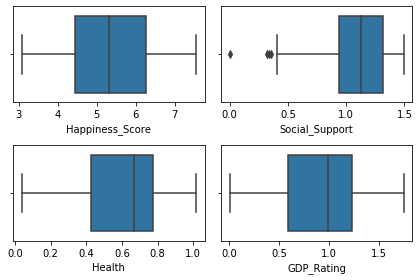

In [34]:
fig_dims = (19, 15)
fig, axes = plt.subplots(2, 2)
sns.boxplot(x=Merged_df['Happiness_Score'], ax=axes[0, 0])
sns.boxplot(x=Merged_df['Social_Support'], ax=axes[0, 1])
sns.boxplot(x=Merged_df['Health'], ax=axes[1, 0])
sns.boxplot(x=Merged_df['GDP_Rating'], ax=axes[1, 1])
fig.tight_layout()
fig.savefig(
    "Boxplot_for_Happiness_Score_Social_Support_Health_GDP_Rating Before Normalization")

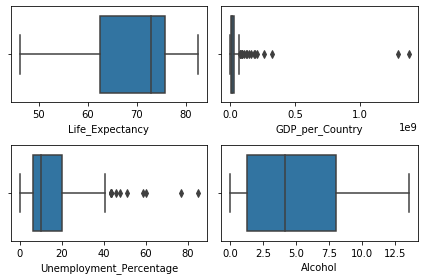

In [35]:
fig_dims = (19, 15)
fig, axes = plt.subplots(2, 2)
sns.boxplot(x=Merged_df['Life_Expectancy'], ax=axes[0, 0])
sns.boxplot(x=Merged_df['GDP_per_Country'], ax=axes[0, 1])
sns.boxplot(x=Merged_df['Unemployment_Percentage'], ax=axes[1, 0])
sns.boxplot(x=Merged_df['Alcohol'], ax=axes[1, 1])
fig.tight_layout()
fig.savefig(
    "Boxplot_for_Life_Expectancy_GDP_per_Country_Unemployment_Percentage_GDP_Alcohol Before Normalization")

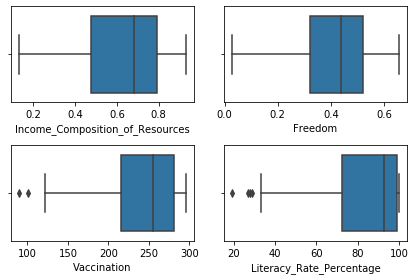

In [36]:
fig_dims = (19, 15)
fig, axes = plt.subplots(2, 2)
sns.boxplot(x=Merged_df['Income_Composition_of_Resources'], ax=axes[0, 0])
sns.boxplot(x=Merged_df['Freedom'], ax=axes[0, 1])
sns.boxplot(x=Merged_df['Vaccination'], ax=axes[1, 0])
sns.boxplot(x=Merged_df['Literacy_Rate_Percentage'], ax=axes[1, 1])
fig.tight_layout()
fig.savefig("Boxplot_for_Income_Composition_of_Resources_Freedom_Vaccination_GDP_Literacy_Rate_Percentage Before Normalization")

# Normalization and scaling

We choose Boxcox as our normalization method to smooth the outliers in the data. After normalization we used min-max scale to scale our data from 0 to 1. Thats because boxcox makes a different range for each column. Of course, boxcox was not applied on the columns that did not have outliers and only min-max scale were applied. After applying normalization and scaling we plotted the boxplots for each column that we will be using to be sure that the data was smooth and scaled. 

The maximum number of outliers in a column was 4 excluding the GDP_per_Country the percentage of outliers are (4/156)*100 is ~3%  therefore, they can be ignored. In the case of the GDP_per_Country, from the boxplot it can be seen that the majority of the countries are on the lower side and the rest on the higher side, which makes sense since the majority of the countries have average to poor and the rest of the countries are rich.     

In [37]:
Merged_Tidy_df = normalise_and_scale(Merged_df, [
                                     'Social_Support', 'Vaccination', 'Literacy_Rate_Percentage', 'Unemployment_Percentage'])
Merged_Tidy_df = normalise(Merged_Tidy_df, [
                           'Happiness_Score', 'Health', 'Life_Expectancy', 'Alcohol', 'Income_Composition_of_Resources', 'GDP_per_Country', 'Freedom'])

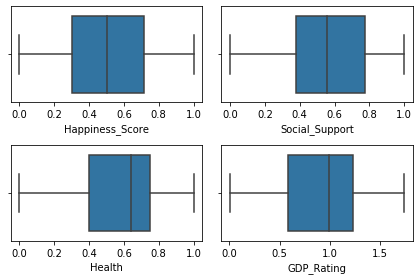

In [38]:
fig_dims = (19, 15)
fig, axes = plt.subplots(2, 2)
sns.boxplot(x=Merged_Tidy_df['Happiness_Score'], ax=axes[0, 0])
sns.boxplot(x=Merged_Tidy_df['Social_Support'], ax=axes[0, 1])
sns.boxplot(x=Merged_Tidy_df['Health'], ax=axes[1, 0])
sns.boxplot(x=Merged_Tidy_df['GDP_Rating'], ax=axes[1, 1])
fig.tight_layout()
fig.savefig(
    "Boxplot_for_Happiness_Score_Social_Support_Health_GDP_Rating After Normalization")

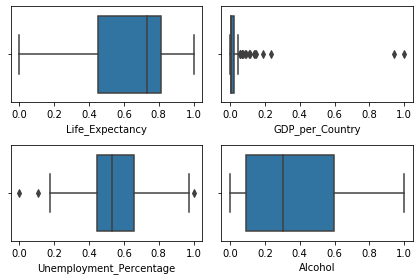

In [39]:
fig_dims = (19, 15)
fig, axes = plt.subplots(2, 2)
sns.boxplot(x=Merged_Tidy_df['Life_Expectancy'], ax=axes[0, 0])
sns.boxplot(x=Merged_Tidy_df['GDP_per_Country'], ax=axes[0, 1])
sns.boxplot(x=Merged_Tidy_df['Unemployment_Percentage'], ax=axes[1, 0])
sns.boxplot(x=Merged_Tidy_df['Alcohol'], ax=axes[1, 1])
fig.tight_layout()
fig.savefig(
    "Boxplot_for_Life_Expectancy_GDP_per_Country_Unemployment_Percentage_GDP_Alcohol After Normalization")

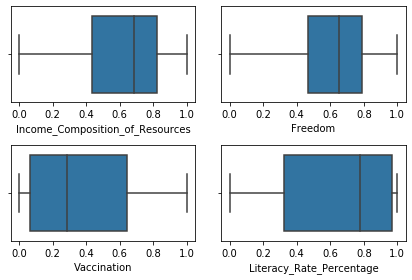

In [40]:
fig_dims = (19, 15)
fig, axes = plt.subplots(2, 2)
sns.boxplot(x=Merged_Tidy_df['Income_Composition_of_Resources'], ax=axes[0, 0])
sns.boxplot(x=Merged_Tidy_df['Freedom'], ax=axes[0, 1])
sns.boxplot(x=Merged_Tidy_df['Vaccination'], ax=axes[1, 0])
sns.boxplot(x=Merged_Tidy_df['Literacy_Rate_Percentage'], ax=axes[1, 1])
fig.tight_layout()
fig.savefig("Boxplot_for_Income_Composition_of_Resources_Freedom_Vaccination_GDP_Literacy_Rate_Percentage After Normalization")

# Visualisation

In [41]:
# developing = 1, developed = 0
# landlocked = 1, not landlocked = 0
Merged_Tidy_df

,Country/Region,Happiness_Score,GDP_Rating,Social_Support,Health,Freedom,Status,Life_Expectancy,Alcohol,Income_Composition_of_Resources,Vaccination,Literacy_Rate_Percentage,Unemployment_Percentage,Landlocked,GDP_per_Country
0,Afghanistan,0.097112,0.357113,0.076345,0.222129,0.143967,1,0.331675,0.000324,0.354720,0.007114,0.008890,0.776058,1,0.020030
1,Albania,0.365704,0.938633,0.247140,0.768025,0.548027,1,0.797358,0.358763,0.722960,0.947595,0.955277,0.621307,0,0.002047
2,Algeria,0.579494,1.012963,0.504638,0.642416,0.240241,1,0.755148,0.029410,0.704204,0.350735,0.437978,0.529027,0,0.029284
3,Angola,0.177580,0.798380,0.382836,0.098399,0.000000,1,0.079787,0.424892,0.408487,0.006680,0.292048,0.658289,0,0.018732
4,Argentina,0.756750,1.111035,0.786470,0.740575,0.722589,1,0.797358,0.589936,0.828306,0.417162,0.928473,0.474910,0,0.031603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Venezuela,0.549004,1.052468,0.777016,0.661552,0.296357,1,0.748799,0.549404,0.744139,0.053221,0.812920,0.469508,0,0.022484
151,Vietnam,0.464652,0.723416,0.568676,0.701455,0.874664,1,0.786891,0.228165,0.619412,0.522487,0.613020,0.428655,0,0.067254
152,Yemen,0.122409,0.489313,0.324997,0.335544,0.344826,1,0.487303,0.002768,0.429900,0.029598,0.223988,0.776058,0,0.019901
153,Zambia,0.337005,0.571761,0.377891,0.271347,0.691532,1,0.213967,0.165291,0.458581,0.051117,0.180116,0.598172,1,0.011519


In [42]:
landlocked = pd.DataFrame()
not_landlocked = pd.DataFrame()
for i in Merged_Tidy_df.index:
    if(Merged_Tidy_df['Landlocked'][i] == 1):
        landlocked = landlocked.append(Merged_Tidy_df.loc[i])
    else:
        not_landlocked = not_landlocked.append(Merged_Tidy_df.loc[i])

## Correlation Map

A correlation map that shows potential correlations between columns of the dataset. 

Text(0.5, 1.05, 'Correlation Matrix')

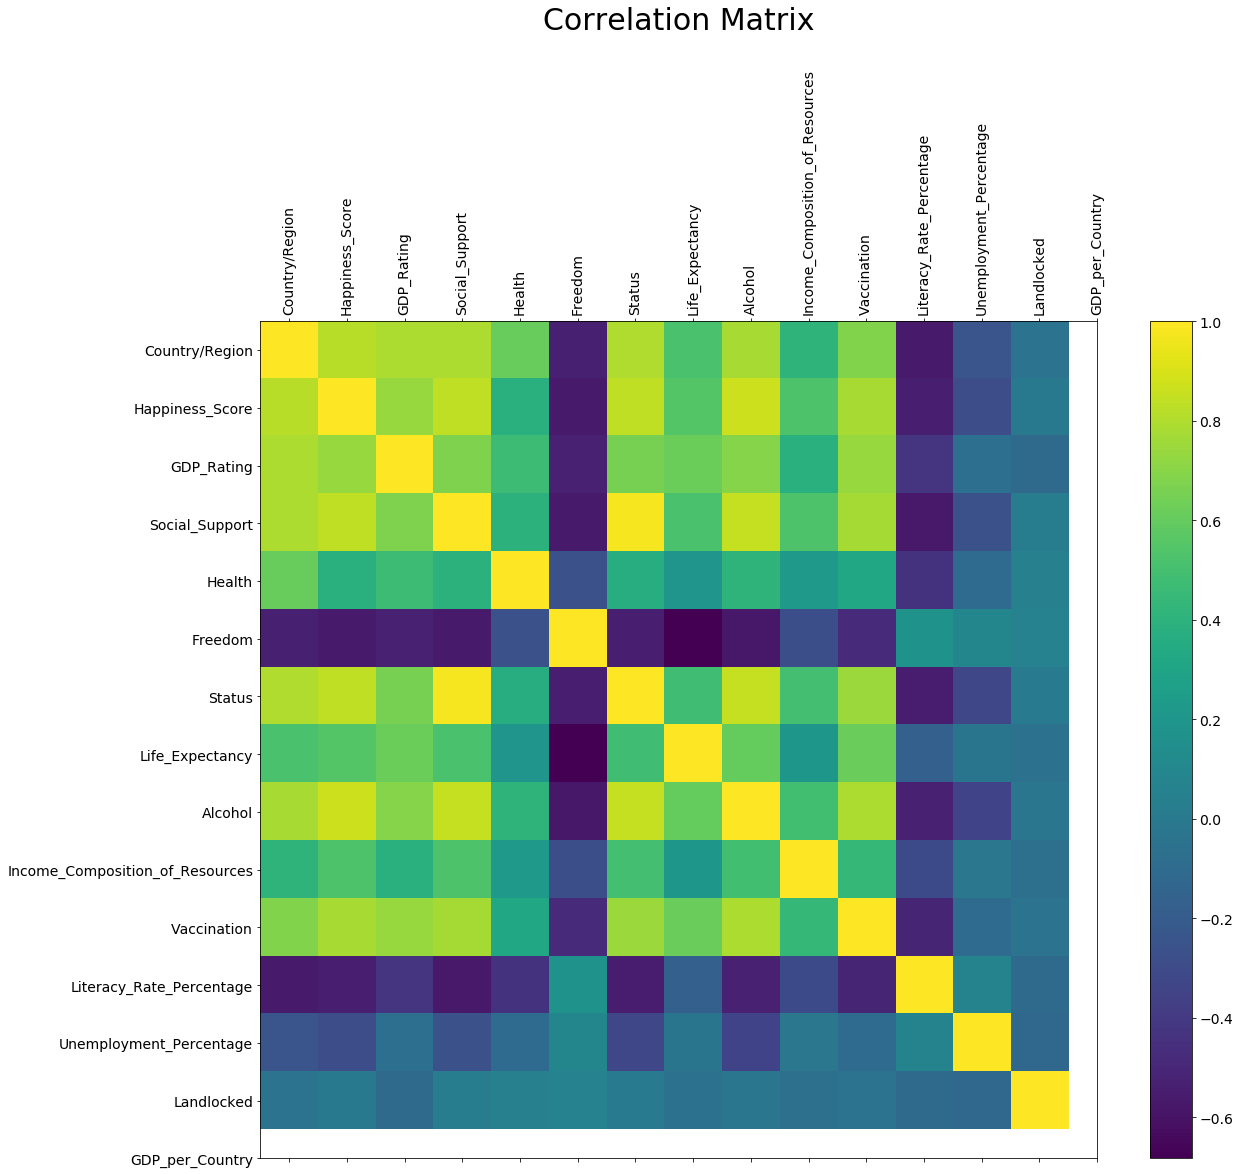

In [43]:
f = plt.figure(figsize=(19, 15))
plt.matshow(Merged_Tidy_df.corr(), fignum=f.number)
plt.xticks(range(Merged_Tidy_df.shape[1]),
           Merged_Tidy_df.columns, fontsize=14, rotation=90)
plt.yticks(range(Merged_Tidy_df.shape[1]), Merged_Tidy_df.columns, fontsize=14)
cb = plt.colorbar(cmap='hot')
cb.ax.tick_params(labelsize=14)
f.savefig("Correlation Map")
plt.title('Correlation Matrix', fontsize= 30, pad=250)

## Count of landlocked based on status

We wanted to display the ratio of developing to developed countries in landlocked and non landlocked countries.
In the following graph, orange represents the landlocked countries while blue represents countries with a coast. Additionally, the left bar represents developed countries while the right bar represents developing countries. As we can see in the figure below the percentage of already developed countries is smaller in landlocked countries than in not landlocked countries. This made us interested in searching for whether or not not landlocked countries have a better chance to be developed countries. Therefore, we started searching for the differences between landlocked countries and not landlocked countries. 
(Status: 0:developed, 1:developing)
(Landlocked: orange:landlocked, blue:non-landlocked)

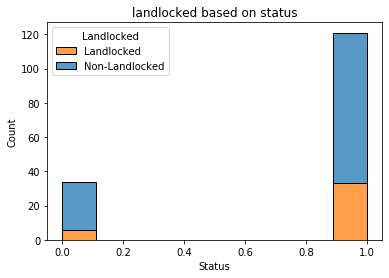

In [44]:
g = sns_plot = sns.histplot(data=Merged_Tidy_df, x="Status",
                            hue="Landlocked", multiple="stack")
fig = sns_plot.get_figure()
plt.title('landlocked based on status')
plt.legend(title='Landlocked', loc='upper left',
           labels=['Landlocked', 'Non-Landlocked'])
plt.show(g)
fig.savefig("count_of_landlocked_based_on_status")

## Alcohol consumption

We first thought about alcohol consumption as countries with beaches are a more fertile ground for parties and tourists leading to more alcohol consumption. As we can see in the figures below alcohol consumption is higher in the not landlocked countries as in the not landlocked figure is getting denser as the alcohol consumption increases compared to landlocked countries. 

Text(0.5, 0.98, 'Alcohol Consumption Density')

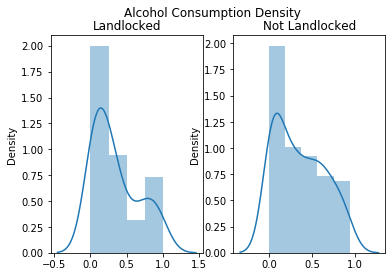

In [45]:
fig_dims = (20, 5)
fig, ax = plt.subplots(1, 2)
landlocked_graph = sns.distplot(x=landlocked["Alcohol"], ax=ax[0])
not_landlocked_graph = sns.distplot(x=not_landlocked["Alcohol"], ax=ax[1])
fig.savefig("Insight on Alcohol")
landlocked_graph.set_title('Landlocked')
not_landlocked_graph.set_title('Not Landlocked')
fig.suptitle('Alcohol Consumption Density', fontsize=12)

## Freedom

Afterwards, we thought if alcohol consumption is higher in the not landlocked countries this may mean that they have more freedom. As alcohol in some is a freedom issue. So if the freedom of choice is high that helps in alcohol consumption. So we decided to see the freedom relationship with the landlocked column. As we can see the freedom in the not landlocked countries had a higher rating as it is negatively skewed compared to landlocked countries.  

Text(0.5, 0.98, 'Freedom Density')

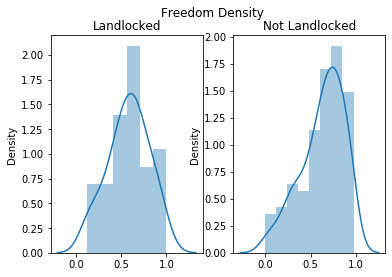

In [46]:
fig_dims = (20, 5)
fig, ax = plt.subplots(1, 2)
landlocked_graph = sns.distplot(x=landlocked["Freedom"], ax=ax[0])
not_landlocked_graph = sns.distplot(x=not_landlocked["Freedom"], ax=ax[1])
fig.savefig("Insight on Freedom")
landlocked_graph.set_title('Landlocked')
not_landlocked_graph.set_title('Not Landlocked')
fig.suptitle('Freedom Density', fontsize=12)

## Vaccination 

One of the issues of high freedom is that nowadays a lot of people do not vaccinate. As it is their right not to and they are free to do whatever they want. Therefore, we started studying the vaccination in landlocked and not landlocked countries. The following figures shows that there is not much difference between landlocked and not landlocked countries. However, the density of people that are not vaccinated in not landlocked countries are slightly higher (0.0 to 0.2). 

Text(0.5, 0.98, 'Vaccination Density')

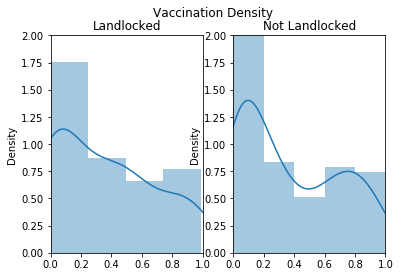

In [47]:
fig_dims = (20, 5)
fig, ax = plt.subplots(1, 2)
landlocked_graph = sns.distplot(x=landlocked["Vaccination"], ax=ax[0])
not_landlocked_graph = sns.distplot(x=not_landlocked["Vaccination"], ax=ax[1])
landlocked_graph.set(xlim=(0, 1))
landlocked_graph.set(ylim=(0, 2))
not_landlocked_graph.set(xlim=(0, 1))
not_landlocked_graph.set(ylim=(0, 2))
fig.savefig("Insight on Vaccination")
landlocked_graph.set_title('Landlocked')
not_landlocked_graph.set_title('Not Landlocked')
fig.suptitle('Vaccination Density', fontsize=12)

## GDP per Country

As we thought about tourism, alcohol consumption, and parties. We also thought about how access to beaches can a affect a country's GDP. It has been found that the GDP of non-landlocked countries had higher densities while increasing in comparison to the landlocked country's GDP.

Text(0.5, 0.98, 'GDP per Country Density')

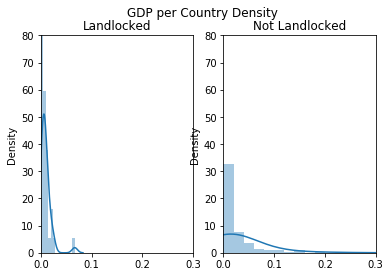

In [48]:
fig_dims = (20, 5)
fig, ax = plt.subplots(1, 2)
landlocked_graph = sns.distplot(x=landlocked["GDP_per_Country"], ax=ax[0])
not_landlocked_graph = sns.distplot(
    x=not_landlocked["GDP_per_Country"], ax=ax[1])
landlocked_graph.set(xlim=(0, 0.3))
landlocked_graph.set(ylim=(0, 80))
not_landlocked_graph.set(xlim=(0, 0.3))
not_landlocked_graph.set(ylim=(0, 80))
fig.savefig("Insight on GDP per Country Density")
landlocked_graph.set_title('Landlocked')
not_landlocked_graph.set_title('Not Landlocked')
fig.suptitle('GDP per Country Density', fontsize=12)

We also then calculated the mean GDP per country for landlocked countries and not landlocked countries. As we can see, on average, the GDP of not landlocked countries is way higher than that of landlocked countries.

Text(0.5, 0.98, 'GDP per Country Means')

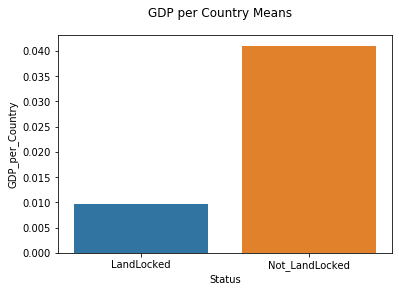

In [49]:
fig_dims = (20, 5)
data = [['LandLocked', landlocked['GDP_per_Country'].mean(
)], ['Not_LandLocked', not_landlocked['GDP_per_Country'].mean()]]
df_GDP_mean_country = pd.DataFrame(data, columns=['Category', 'Mean'])
bp_tips = sns.barplot(x='Category', y='Mean',
                      data=df_GDP_mean_country, estimator=np.median)
bp_tips.set(xlabel="Status", ylabel="GDP_per_Country")
fig = bp_tips.get_figure()
fig.savefig("Insight on GDP per Country Mean")
df_GDP_mean_country
landlocked_graph.set_title('Landlocked')
not_landlocked_graph.set_title('Not Landlocked')
fig.suptitle('GDP per Country Means', fontsize=12)

## Health and Social Support 

There are 5 zones that exist in the world called the blue zones. These zones have the oldest living people in the world. The common things between the 5 blue zones are close family relationships, social relationships, healthy diet, physical activity and clear sense of purpose. It also happens that these blue zones have access to beaches. Close family relationships and social relationships are rated by the country people and represented by social support. While, a healthy diet and physical activity are represented by Health. So we wanted to see if there is a relationship between both of them. As we can see in the figures, as the social support increases the health increases in both landlocked and not landlocked countries. However, in not landlocked countries both health and social support have a better "performance" than landlocked countries. In addition, in not landlocked countries the gap between developing and developed countries is small compared to the gap in the landlocked countries. So maybe being a not landlocked country helps in developing good overall health and social support. 

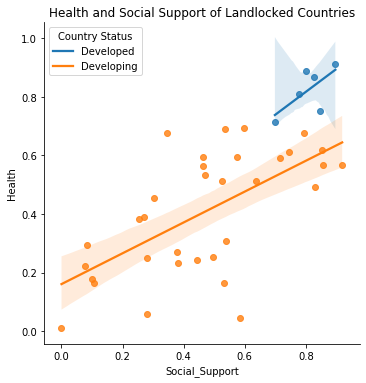

In [50]:
fig_dims = (20, 5)
SeabornBARCHART = sns.lmplot(
    x="Social_Support", y="Health", hue="Status", data=landlocked, legend_out=False)
plt.title('Health and Social Support of Landlocked Countries', fontsize=12)
plt.legend(title='Country Status', loc='upper left',
           labels=['Developed', 'Developing'])
SeabornBARCHART.savefig("Insight on Social_Support vs Health landlocked")

Text(0.5, 1, 'Health and Social Support of not Landlocked Countries')

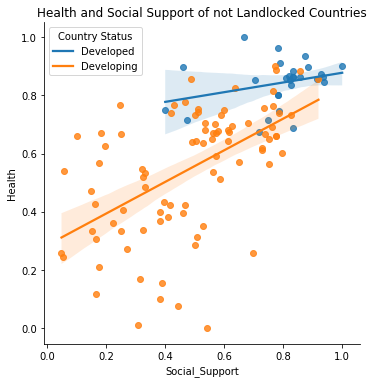

In [51]:
SeabornBARCHART = sns.lmplot(
    x="Social_Support", y="Health", hue="Status", data=not_landlocked, legend_out=False)
plt.legend(title='Country Status', loc='upper left',
           labels=['Developed', 'Developing'])
SeabornBARCHART.savefig("Insight on Social_Support vs Health NOTlandlocked")
plt.title('Health and Social Support of not Landlocked Countries', fontsize=12)

## Income Composition of Resources

Health, alcohol, freedom and social support are factors that determine how good a country is performing and the well being of its citizens. However, there are many other factors. The Income Composition of Resources is based on human development. Therefore, we started to think what develops a healthy life for humans? And the first thing that came to mind was purpose; as it was on of the criteria for the blue zone areas. But how do we measure purpose? We simplified it a bit and proposed that having a job gives a sense of purpose. But, to be able to have a job a person will have to be educated and therefore literacy plays a part. Having a population that has a purpose and educated contributes to a good economy therefore, a good GDP. In addition, according to the blue zones having a purpose leads to higher life expectancy. This lead us to investigate the relationships between Income Composition of Resources and:
<ol>
  <li>Literacy Rate Percentage</li>
  <li>Unemployment Percentage</li>
  <li>GDP Rating</li>
  <li>Life Expectancy</li>
</ol>

### Income Composition of Resources and Literacy

As we can see from the figure below that as the literacy rate increases the Income Composition of Resources increases meaning a better human development. Furthermore, developed countries mostly have a higher Income Composition of Resources than developing countries.

Text(0.5, 1, 'Income Composition of Resources and Literacy')

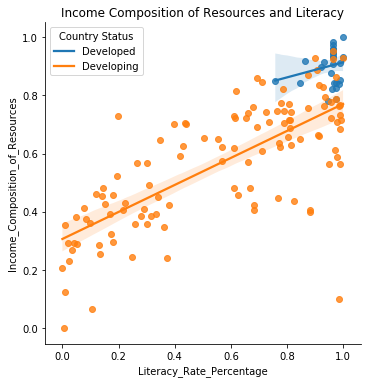

In [52]:
fig_dims = (20, 5)
SeabornBARCHART = sns.lmplot(x="Literacy_Rate_Percentage",
                             y="Income_Composition_of_Resources", hue="Status", data=Merged_Tidy_df, fit_reg=True, legend_out = False)

plt.legend(title='Country Status', loc='upper left',
           labels=['Developed', 'Developing'])
SeabornBARCHART.savefig(
    "Insight on Literacy_Rate_Percentage vs Income_Composition_of_Resources")
plt.title('Income Composition of Resources and Literacy', fontsize=12)

### Income Composition of Resources and Unemployment Rate

As we can see from the figure below that as the unemployment rate increases the Income Composition of Resources decreases, which means worse human development. Furthermore, developed countries mostly have a higher Income Composition of Resources than developing countries. This shows that there is a relationship between having a job (which translates to a sense of purpose) and a better Income Composition of Resources.

Text(0.5, 1, 'Income Composition of Resources and Literacy')

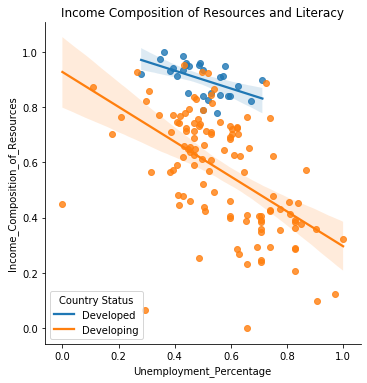

In [53]:
fig_dims = (20, 5)
SeabornBARCHART = sns.lmplot(x='Unemployment_Percentage', y="Income_Composition_of_Resources",
                             hue="Status", data=Merged_Tidy_df, fit_reg=True, legend_out = False)
plt.legend(title='Country Status', loc='lower left',
           labels=['Developed', 'Developing'])
SeabornBARCHART.savefig(
    "Insight on Unemployment_Percentage vs Income_Composition_of_Resources")
plt.title('Income Composition of Resources and Literacy', fontsize=12)

### Income Composition of Resources and GDP

As we can see from the figure, there is a strong positive correlation between the GDP Rating and the Income Composition of Resources, which translates to better human development. Furthermore, developed countries mostly have a higher Income Composition of Resources than developing countries. 

Text(0.5, 1, 'Income Composition of Resources and GDP')

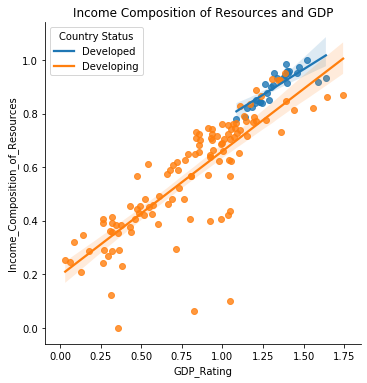

In [54]:
fig_dims = (20, 5)
SeabornBARCHART = sns.lmplot(x='GDP_Rating', y="Income_Composition_of_Resources",
                             hue="Status", data=Merged_Tidy_df, fit_reg=True, legend_out = False)
plt.legend(title='Country Status', loc='upper left',
           labels=['Developed', 'Developing'])
SeabornBARCHART.savefig(
    "Insight on GDP_Rating vs Income_Composition_of_Resources")
plt.title('Income Composition of Resources and GDP', fontsize=12)

### Income Composition of Resources and Life Expectancy

As we can see from the figure below that as the Income Composition of Resources increases the life expectancy increases meaning a better human development. This shows that Income Composition of Resources might be a factor in contributing to a higher life expectancy.

Text(0.5, 1, 'Income Composition of Resources and Life Expectancy')

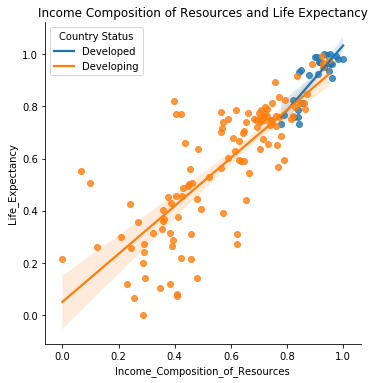

In [55]:
fig_dims = (20, 5)
SeabornBARCHART = sns.lmplot(x='Income_Composition_of_Resources',
                             y="Life_Expectancy", hue="Status", data=Merged_Tidy_df, fit_reg=True, legend_out = False)

plt.legend(title='Country Status', loc='upper left',
           labels=['Developed', 'Developing'])

SeabornBARCHART.savefig(
    "Insight on Life_Expectancy vs Income_Composition_of_Resources")
plt.title('Income Composition of Resources and Life Expectancy', fontsize=12)

### Income Composition of Resources and landlocked

How Income Composition of Resources contributes to having a better country and a better life for its citizens shows how important it is. Therefore, we wanted to see if being a landlocked country or a not landlocked country contributes to a better or worse Income Composition of Resources.

Therefore, we calculated the mean value of the Income Composition of Resources for landlocked countries and not landlocked countries. As we can see not landlocked countries have a way better mean than landlocked countries. Meaning that having access to a beach might help in a better Income Composition of Resources and therefore, a better employment rate, literacy rate, GDP and life expectancy.

,Category,Mean
0,LandLocked,0.496929
1,Not_LandLocked,0.680486


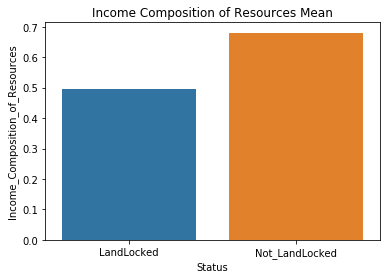

In [56]:
fig_dims = (20, 5)
data = [['LandLocked', landlocked['Income_Composition_of_Resources'].mean(
)], ['Not_LandLocked', not_landlocked['Income_Composition_of_Resources'].mean()]]
Income_Composition_Of_Resources = pd.DataFrame(
    data, columns=['Category', 'Mean'])
bp_tips = sns.barplot(x='Category', y='Mean',
                      data=Income_Composition_Of_Resources, estimator=np.median)
bp_tips.set(xlabel="Status", ylabel="Income_Composition_of_Resources")
plt.title('Income Composition of Resources Mean', fontsize=12)
fig = bp_tips.get_figure()
fig.savefig("Insight on Income_Composition_of_Resources Mean.png")
Income_Composition_Of_Resources

### Income Composition of Resources and happiness score

However, does Income Composition of Resources make citizens happier? The blue zone areas shows that all of this leads to a longer life but does it lead to a happy one? Therefore, we investigated the relationship between Income Composition of Resources and happiness score.

As we can see in the figure below, as the Income Composition of Resources increases the happiness score increases. This means that a country with a good Income Composition of Resources has happy citizens living happy lives.

Text(0.5, 1, 'Income Composition of Resources and happiness score')

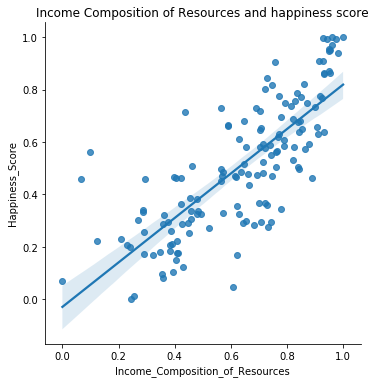

In [57]:
SeabornBARCHART = sns.lmplot(
    x="Income_Composition_of_Resources", y="Happiness_Score", data=Merged_Tidy_df)
SeabornBARCHART.savefig(
    "Insight on Happiness_Score vs Income_Composition_of_Resources")
plt.title('Income Composition of Resources and happiness score', fontsize=12)

## Happiness score and landlock

Until now we saw how having good health, social support, purpose and a long life expectancy leads to a happier life. So how does happiness score compare between landlocked and not landlocked countries?

As we can see in the figure below not landlocked countries have a denser high happiness scores than landlocked countries. 

Text(0.5, 0.98, 'Happiness score and landlock')

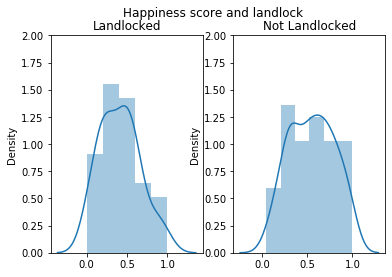

In [58]:
fig_dims = (20, 5)
fig, ax = plt.subplots(1, 2)
landlocked_graph = sns.distplot(x=landlocked["Happiness_Score"], ax=ax[0])
not_landlocked_graph = sns.distplot(
    x=not_landlocked["Happiness_Score"], ax=ax[1])
fig.savefig("Insight on Happiness_Score")
landlocked_graph.set(ylim=(0, 2))
not_landlocked_graph.set(ylim=(0, 2))
landlocked_graph.set_title('Landlocked')
not_landlocked_graph.set_title('Not Landlocked')
fig.suptitle('Happiness score and landlock', fontsize=12)

## Status and Landlocked

However, one might argue that being a landlocked country or a not landlocked country does not matter and what matters is being a developed and developing. But, our question here was if being  landlocked country or not helps a country to be developed. As we can see in the first figure below if you only filter by status you do not get a relationship between the countries and their happiness scores. However, if you classify them by status and landlocked, as in the next two figures, you can see a pattern. In landlocked countries 84.2% of them are still developing  but in not landlocked countries 77.8% are still developing. The percentage gap is small but, not landlocked developing countries have a smaller gap between them and developed countries. While, landlocked developing countries have a higher gap between them and developed countries. 

Text(0.5, 1, 'Status Classification')

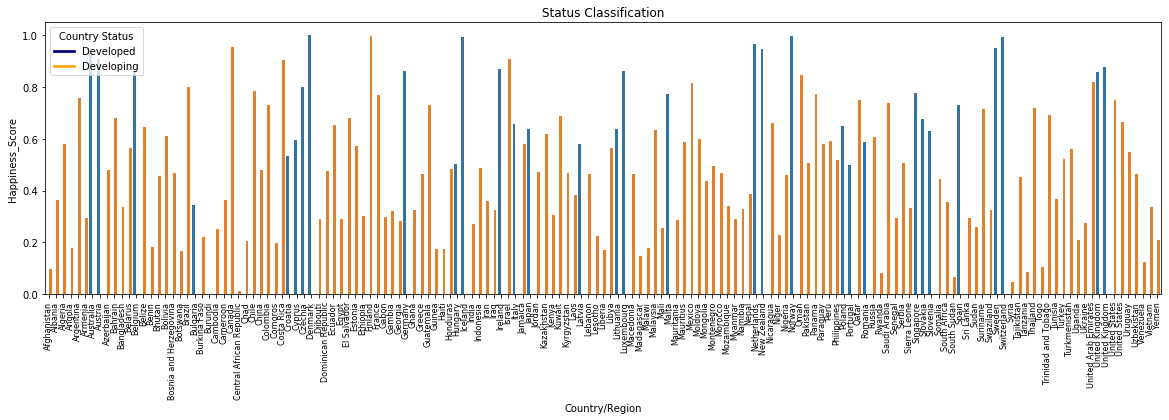

In [59]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="Country/Region", y="Happiness_Score",
                data=Merged_Tidy_df, hue='Status')

plt.legend(title='Country Status', loc='upper left',
           labels=['Developed', 'Developing'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('navy')
leg.legendHandles[1].set_color('orange')
g.set_xticklabels(
    Merged_Tidy_df['Country/Region'].values, rotation=90, fontdict={'size': 8})
fig.savefig("Happiness_Score across all Countries on all data")
g.set_title('Status Classification')

Text(0.5, 1, 'Status and landlocked Classification')

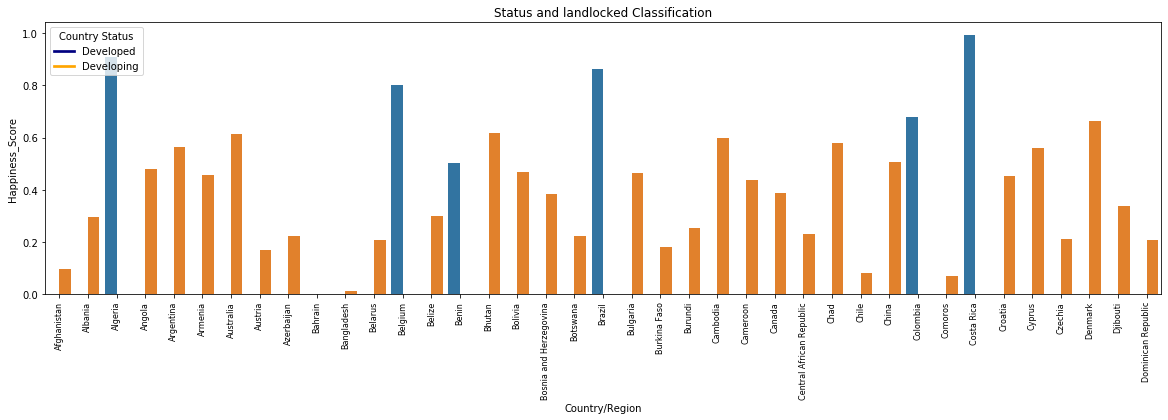

In [60]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="Country/Region", y="Happiness_Score",
                data=landlocked, hue='Status')
plt.legend(title='Country Status', loc='upper left',
           labels=['Developed', 'Developing'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('navy')
leg.legendHandles[1].set_color('orange')
g.set_xticklabels(
    Merged_Tidy_df['Country/Region'].values, rotation=90, fontdict={'size': 8})
fig.savefig("Happiness_Score across all Countries on Landlocked")
g.set_title('Status and landlocked Classification')

Text(0.5, 1, 'Status and not landlocked Classification')

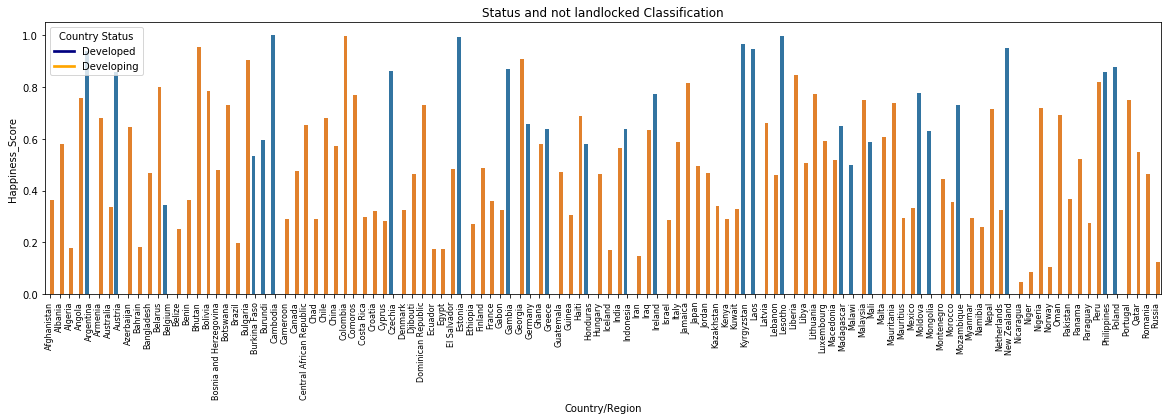

In [61]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="Country/Region", y="Happiness_Score",
                data=not_landlocked, hue='Status')
plt.legend(title='Country Status', loc='upper left',
           labels=['Developed', 'Developing'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('navy')
leg.legendHandles[1].set_color('orange')
g.set_xticklabels(
    Merged_Tidy_df['Country/Region'].values, rotation=90, fontdict={'size': 8})
fig.savefig("Happiness_Score across all Countries on NOTLandlocked")
g.set_title('Status and not landlocked Classification')

# Conclusion

The percentage of developing countries in landlocked countries are higher compared to the percentage of developing countries in not landlocked countries. Furthermore, not landlocked countries had better freedom, Health, Social support and Income Composition of Resources. Leading to a better happiness score. However, the one downside in not landlocked countries compared to landlocked countries was that due to their higher freedom more people in not landlocked countries do not get vaccinated. All in all, being a not landlocked country might be beneficial to the country and help the country to improve and to have happier long living citizens.